In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
plt.style.use('seaborn-v0_8-whitegrid')
from scipy import stats
from ipywidgets import interact, fixed
from sklearn.datasets import make_blobs

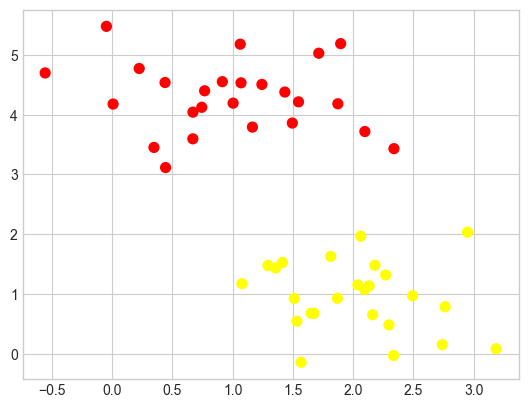

In [72]:
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

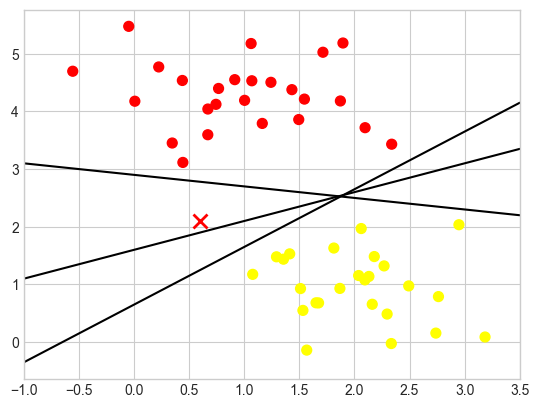

In [73]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()


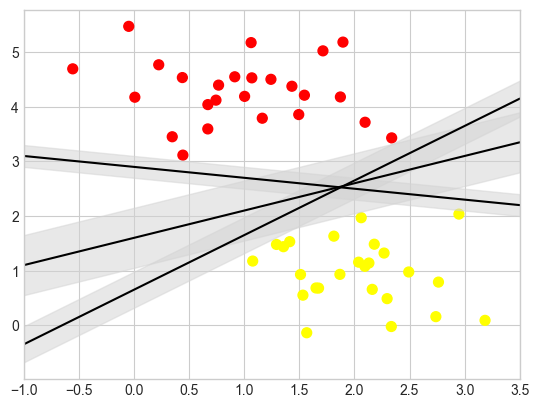

In [74]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='lightgray', alpha=0.5)

plt.xlim(-1, 3.5)
plt.show()


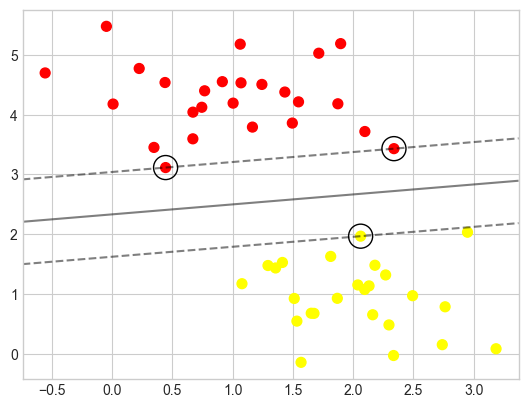

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

In [75]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none')

    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()

model.support_vectors_

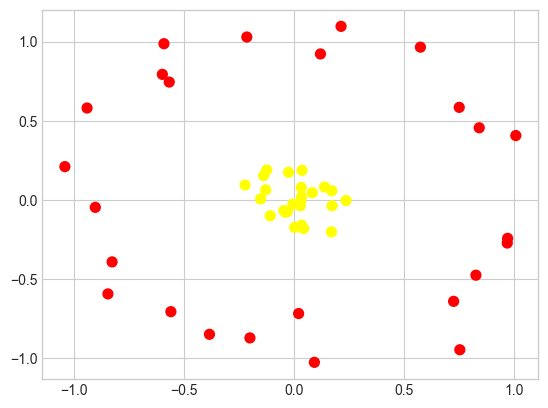

In [76]:
from sklearn.datasets import make_circles
from mpl_toolkits import mplot3d

X, y = make_circles(50, factor=.1, noise=.1)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

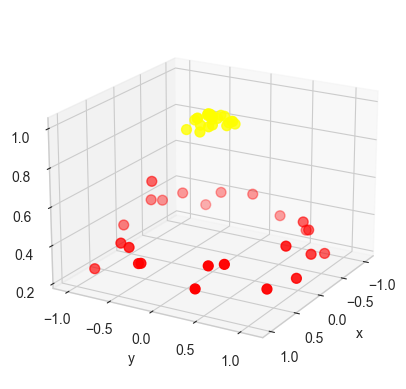

In [77]:
r = np.exp(-(X ** 2).sum(1))
ax = plt.subplot(projection='3d')
ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
ax.view_init(elev=20, azim=30)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('r');
plt.show()

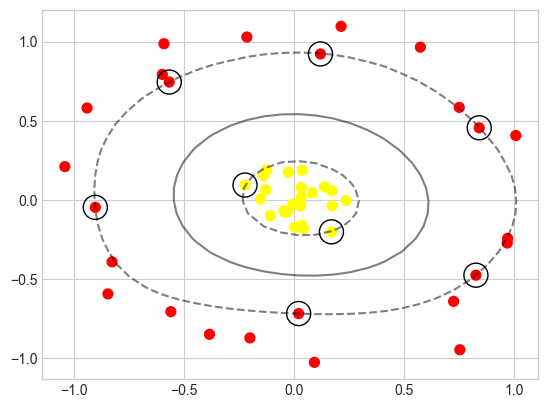

array([[ 0.84193599,  0.45537501],
       [ 0.82692624, -0.47567973],
       [-0.90333475, -0.04717904],
       [ 0.12010458,  0.92168931],
       [-0.56718631,  0.74412282],
       [ 0.0210121 , -0.71785849],
       [ 0.17010724, -0.20186005],
       [-0.22268717,  0.09367768]])

In [78]:
model = SVC(kernel='rbf', C=1E6)
model.fit(X, y)

def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, edgecolors='black',
                   facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)
plt.show()
model.support_vectors_

# Thuật toán tự viết

In [79]:
!pip install ucimlrepo

In [47]:
from ucimlrepo import fetch_ucirepo
  
# fetch dataset
banknote_authentication = fetch_ucirepo(id=267)
# data (as pandas dataframes)
X = banknote_authentication.data.features
y = banknote_authentication.data.targets

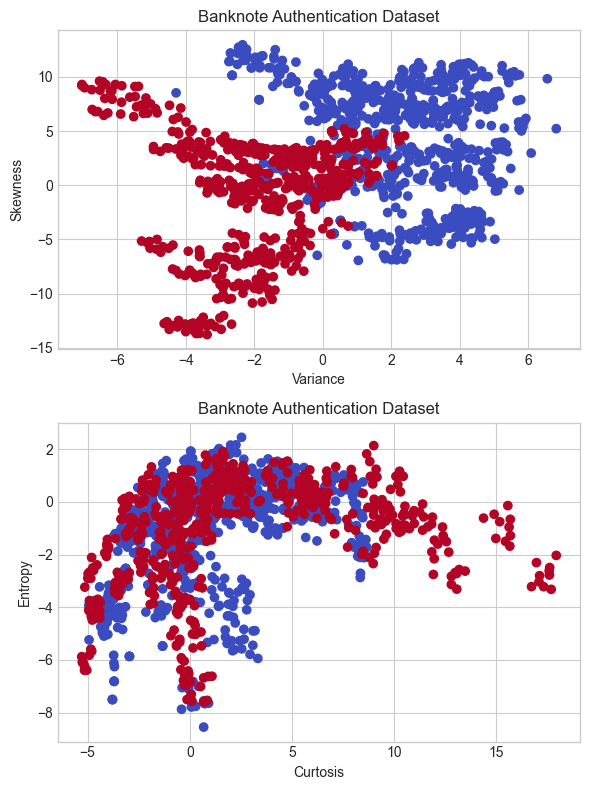

In [48]:
# Plot the data
plt.figure(figsize=(6, 8))
plt.subplot(2, 1, 1)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y['class'], cmap='coolwarm')
plt.xlabel('Variance')
plt.ylabel('Skewness')
plt.title('Banknote Authentication Dataset')
plt.subplot(2, 1, 2)
plt.scatter(X.iloc[:, 2], X.iloc[:, 3], c=y['class'], cmap='coolwarm')
plt.xlabel('Curtosis')
plt.ylabel('Entropy')
plt.title('Banknote Authentication Dataset')
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Giảm chiều dữ liệu
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Chia tập dữ liệu
X_train, X_test, y_train, y_test = train_test_split(X_pca, y.values.ravel(), test_size=0.2, random_state=42)

# Khởi tạo mô hình SVM với kernel tuyến tính
model = SVC(kernel='linear', C=1)
model.fit(X_train, y_train)

# Dự đoán
y_pred = model.predict(X_test)

# Đánh giá kết quả
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác mô hình: {accuracy}")

Độ chính xác mô hình: 0.8909090909090909


Trọng số W: [-0.79456744 -1.41535441 -2.71615165]
Độ lệch b: -0.6468512068904513


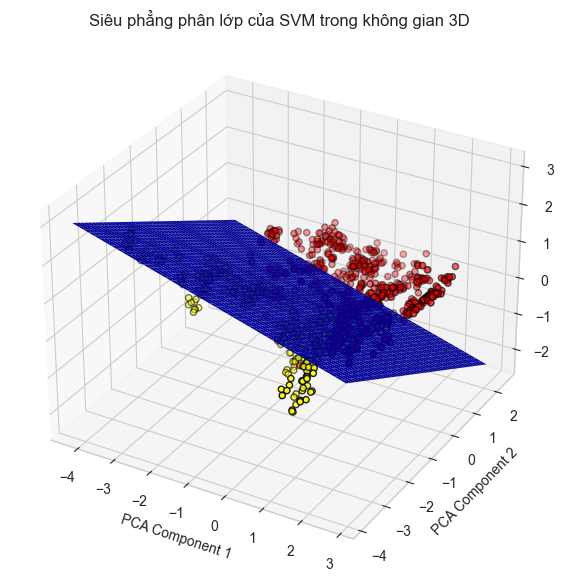

In [62]:
w = model.coef_[0]
print(f"Trọng số W: {w}")
b = model.intercept_[0]
print(f"Độ lệch b: {b}")
x_vals = np.linspace(X_train[:, 0].min(), X_train[:, 0].max())
y_vals = np.linspace(X_train[:, 1].min(), X_train[:, 1].max())
X_grid, Y_grid = np.meshgrid(x_vals, y_vals)
Z_grid = -(w[0] * X_grid + w[1] * Y_grid + b) / w[2]

# Vẽ mặt siêu phẳng
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X_grid, Y_grid, Z_grid, color='blue')

# Vẽ dữ liệu
ax.scatter(X_train[:, 0], X_train[:, 1], X_train[:, 2], c=y_train, cmap="autumn", edgecolors="k")

ax.set_xlabel("PCA Component 1")
ax.set_ylabel("PCA Component 2")
ax.set_zlabel("PCA Component 3")
ax.set_title("Siêu phẳng phân lớp của SVM trong không gian 3D")

plt.show()